# Data exploration for advanced machine learning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

## 1.1 Import data

In [2]:
data = pd.read_csv(r'human-freedom-index-2019.csv')
data

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,8.73,4,1,8.8,7.2,7.2,...,3.7,4.6,9.9,8.6,7.3,8.8,7.1,8.5,8.18,6
1616,2008,DNK,Denmark,Western Europe,8.73,4,1,9.4,7.9,8.7,...,4.7,7.4,9.7,9.4,9.7,8.5,8.2,8.6,7.98,9
1617,2008,CHE,Switzerland,Western Europe,8.83,3,1,-,-,-,...,5.5,7.8,9.3,8.8,8.3,9.3,8.1,8.5,8.35,4
1618,2008,NZL,New Zealand,Oceania,8.94,2,1,8.7,7.6,7.9,...,4.5,4.5,10,9.6,9.8,9.2,7.9,8.8,8.46,3


## 1.2 Select data in year 2017

In [3]:
# Select one year data from the whold dataset
data_2017 = data[data.year==2017]
# data_2016 = data[data.year==2016]
# data_2015 = data[data.year==2015]
# data_2014 = data[data.year==2014]
# data_2013 = data[data.year==2013]
# data_2012 = data[data.year==2012]
# data_2011 = data[data.year==2011]
# data_2010 = data[data.year==2010]
# data_2009 = data[data.year==2009]
# data_2008 = data[data.year==2008]

## 1.3 Missing data discovery

14


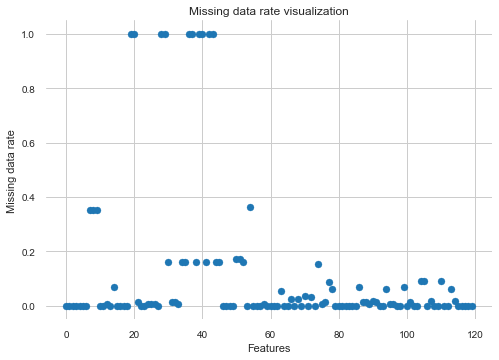

In [29]:
# data_2017.to_csv('year2017HFI.csv')
# Define a cutoff rate for selecting missing data features roughly.
cutoff = 0.2
col_candidate = []
hist_vis = []
for col_name in data_2017.columns.values.tolist():
    len_data = data_2017.shape[0]
    col_val = data_2017[col_name]
    cnt = 0
    for val in col_val:
        if val == '-':
            cnt += 1
    hist_vis.append(float(cnt) / len_data)
    if (float(cnt) / len_data) > cutoff:
#         print(col_name)
        col_candidate.append(str(col_name))

data_2017_selected = data_2017.drop(col_candidate, axis=1)
print(len(col_candidate))
data_2017_selected.shape
plt.scatter(range(120),hist_vis)
plt.xlabel('Features')
plt.ylabel('Missing data rate')
plt.title('Missing data rate visualization')
plt.grid(True)
# plt.savefig(r'C:\Users\ian_c\Desktop\ECS\Adv Machine Learning\IEEETransactions_LaTeX\IEEEtran\fig\Missing.png')
# select 110 features

## 1.4 Data cleaning - with rank labels

In [362]:
hf_score = data_2017_selected['hf_score'].values.astype(np.float32())
print(hf_score.dtype)
data_2017_selected = data_2017_selected.replace('-', 0)
# Build x_train
# print(data_2017_selected.columns.values.tolist()[6:])
data_2017_selected_features = data_2017_selected[data_2017_selected.columns.values.tolist()[6:]]
# drop two rank feature for normalize scale
data_2017_selected_features = data_2017_selected_features.drop(['pf_rank', 'ef_rank'], axis=1)
data_2017_selected_features.values

float32


array([['1', '5.3', '9.1', ..., '6.7', '7.8', '7.67'],
       ['4', '3.8', '9.5', ..., '5.7', '5.4', '4.77'],
       ['4', '3.4', '8.1', ..., '4.9', '5.7', '4.83'],
       ...,
       ['4', '2.4', '7.3', ..., '4', '5', '5.84'],
       ['3', '4.1', '7.9', ..., '6.2', '6.5', '6.84'],
       ['4', '3.5', '7.3', ..., '5', '6.7', '5.69']], dtype=object)

## 2.1 Correlation Analysis via Pearson Coef

In [42]:
# Correction Analysis
import numpy as np
from scipy.stats import pearsonr
cutoff_corr = 0.7
high_corr = []
low_corr = []
corr_res = []

for col_name in data_2017_selected_features.columns.values.tolist():
    col_val = data_2017_selected_features[col_name].values.astype(np.float32())
    pe = pearsonr(hf_score, col_val)
    corr_res.append(pe)
    if pe[0] > cutoff_corr:
        high_corr.append(col_name)
    else:
        low_corr.append(col_name)

print(len(high_corr))
print(len(low_corr))

14
84


## 2.2 Correlation analysis with heatmap visualization

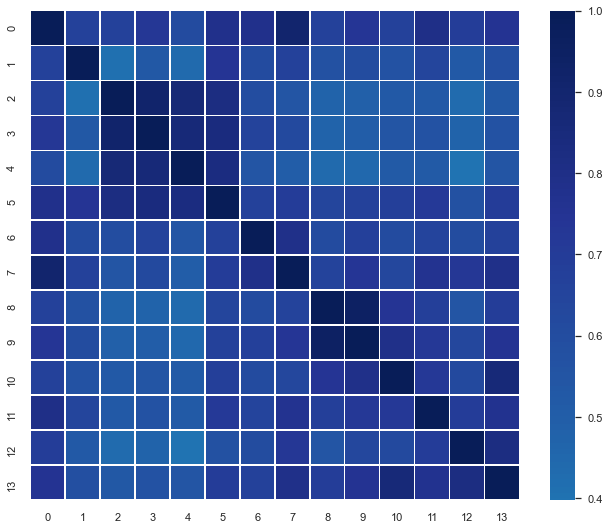

In [170]:
import seaborn as sns

corr_feature = pd.DataFrame(data_2017_selected_features[high_corr].values.astype(np.float32())).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_feature, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

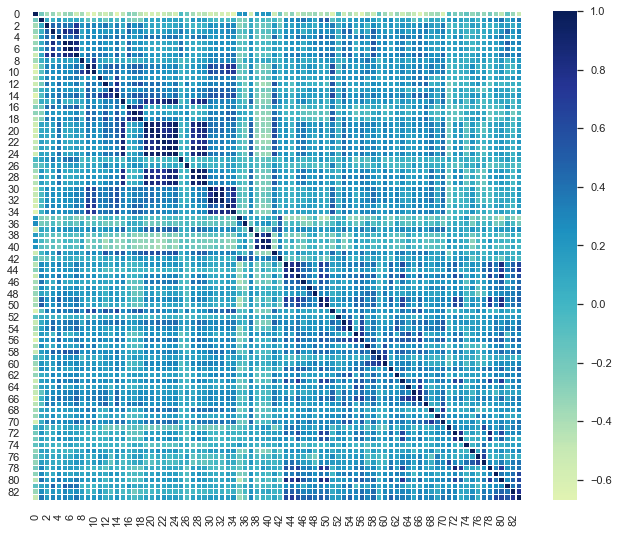

In [171]:
import seaborn as sns

corr_feature = pd.DataFrame(data_2017_selected_features[low_corr].values.astype(np.float32())).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_feature, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

## 2.2 Correlation analysis with scatter visualization - highly correlated


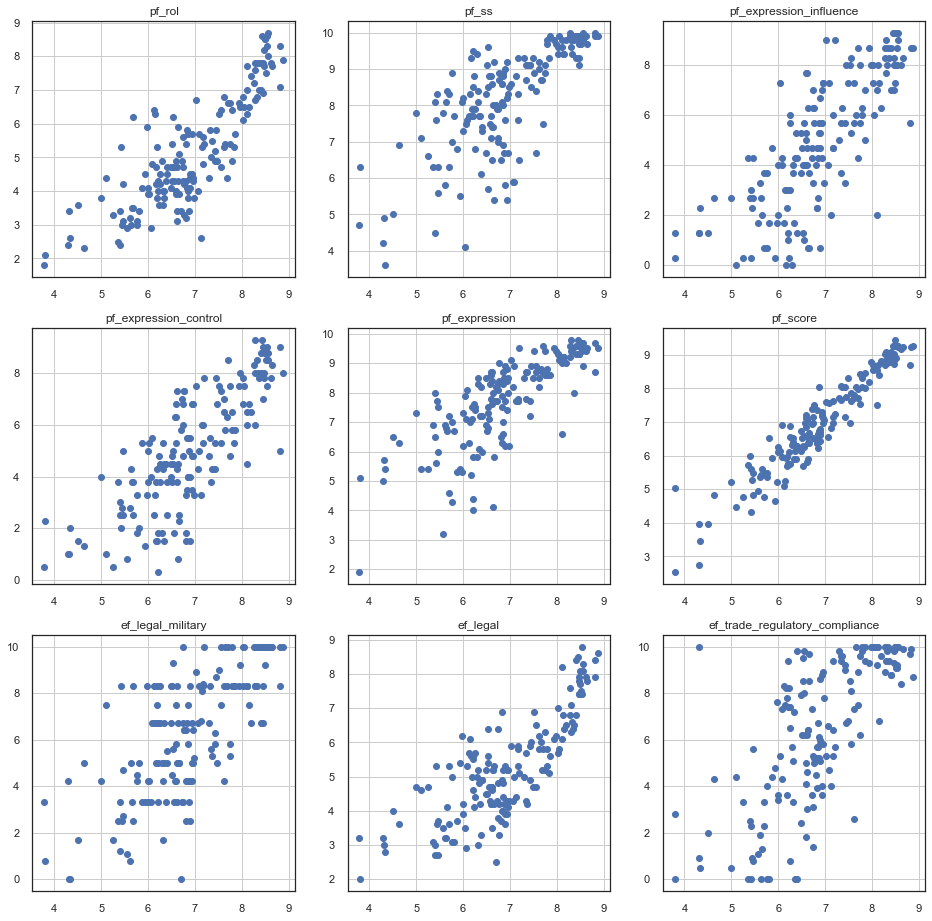

In [371]:
plt.figure(figsize=(16, 16))
for idx, col_name in enumerate(high_corr[:9]):
    col_val = data_2017_selected_features[col_name].values.astype(np.float32())
#     plt.subplot(4, 4, len(high_corr))
    plt.subplot(3, 3, idx+1)
    plt.grid(True)
    plt.scatter(hf_score, col_val)
    plt.title(col_name)
#     plt.savefig('high_corr.png')

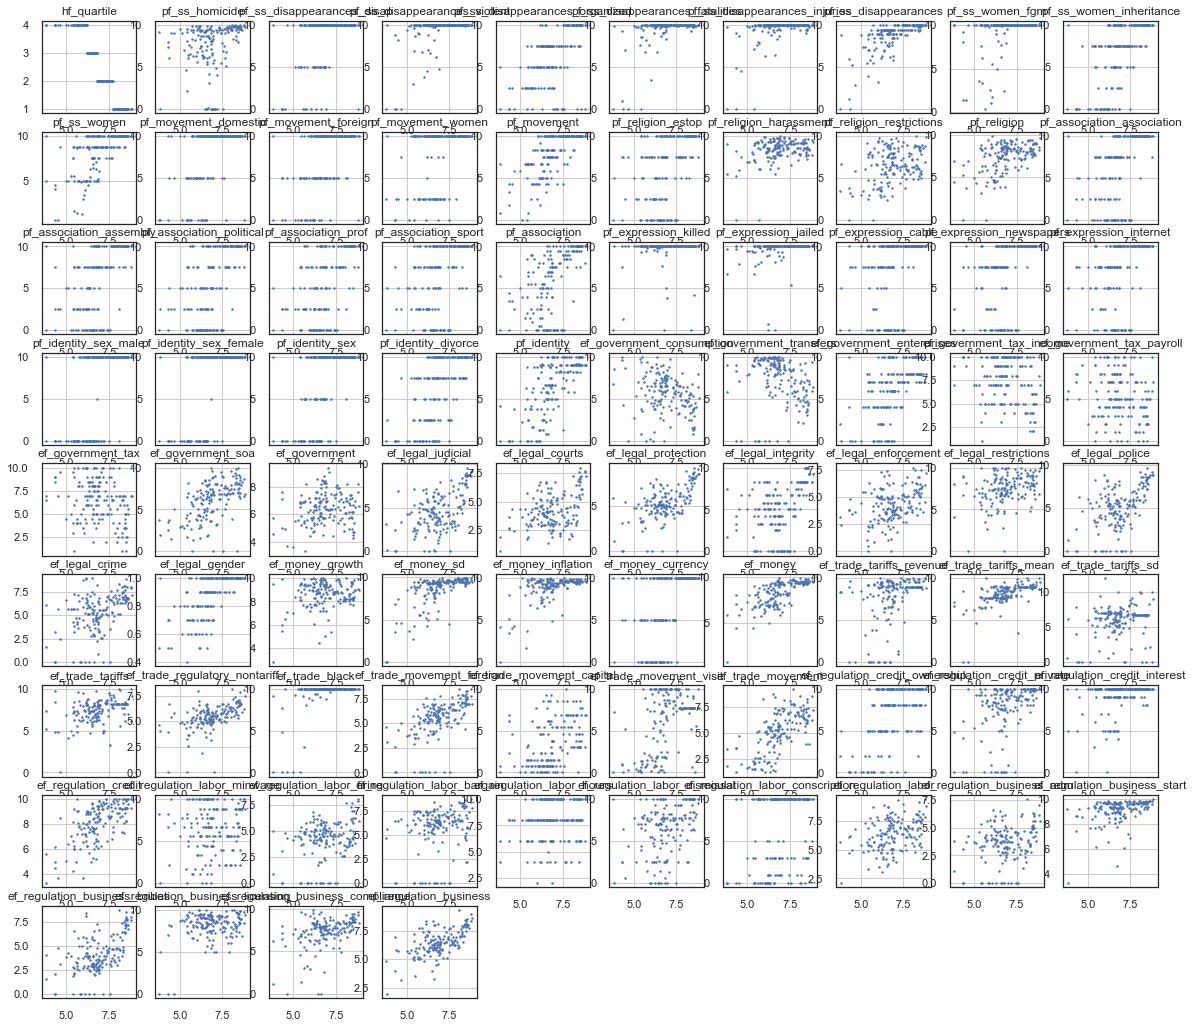

In [173]:
plt.figure(figsize=(20, 20))
for idx, col_name in enumerate(low_corr):
    col_val = data_2017_selected_features[col_name].values.astype(np.float32())
    plt.subplot(10, 10, len(high_corr))
    plt.subplot(10, 10, idx+1)
    plt.grid(True)
    plt.scatter(hf_score, col_val, s=2)
    plt.title(col_name)
#     plt.savefig('low_corr.png')

## 2.3 Feature selection - SelectKBest - scatter with y_train and features

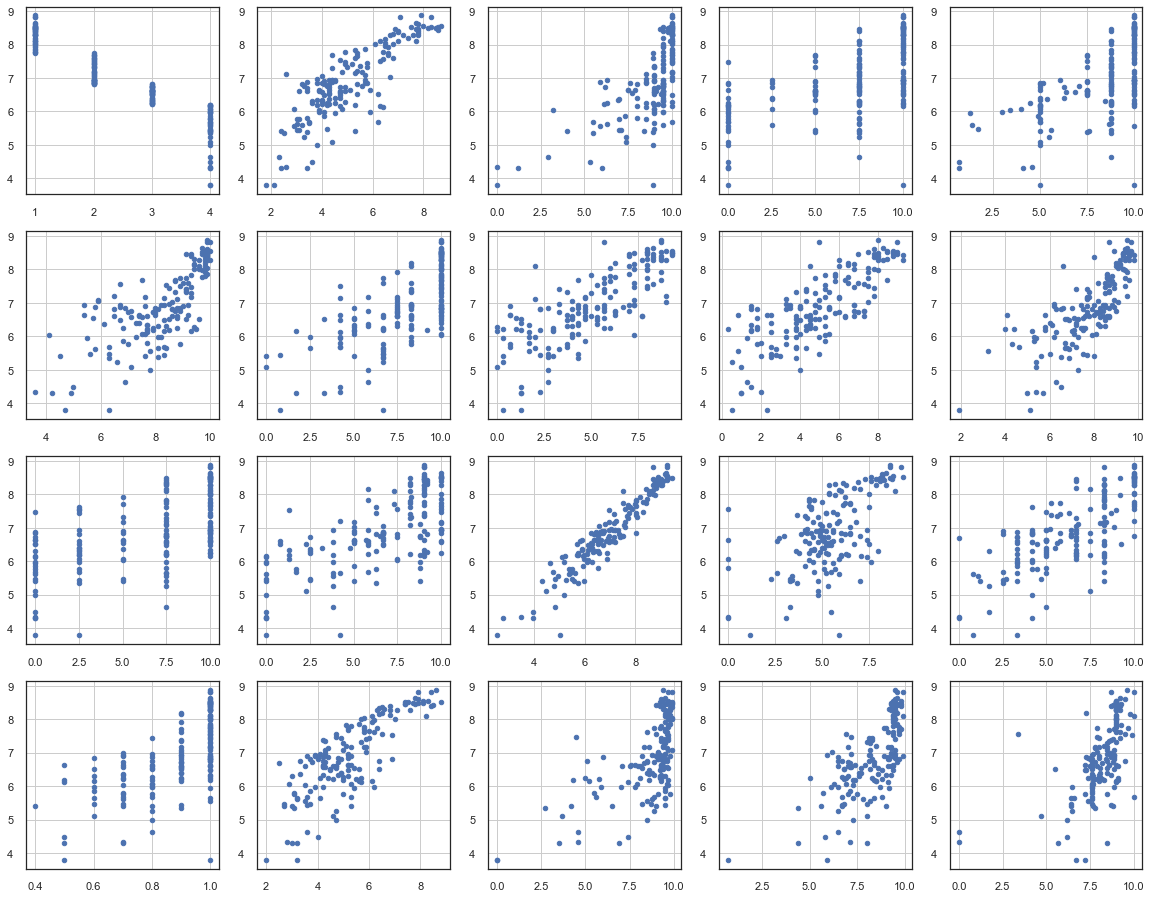

In [363]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
y_train = hf_score.astype('float')
x_train_k2 = SelectKBest(f_regression, k=30).fit_transform(data_2017_selected_features.values, y_train)

x_train_k2.astype('float')
# print(hf_score)

plt.figure(figsize=(20, 20))
for idx in range(20):
    x = x_train_k2[:, idx].astype('float')
    plt.subplot(5, 5, idx+1)
    plt.grid(True)
    plt.scatter(x, hf_score, s=20)
#     plt.savefig(r'C:\Users\ian_c\Desktop\ECS\Adv Machine Learning\IEEETransactions_LaTeX\IEEEtran\fig\x_train_k2.png')

## 2.3 Feature selection - ExtraTreesRegressor - scatter with y_train and features

(162, 5)


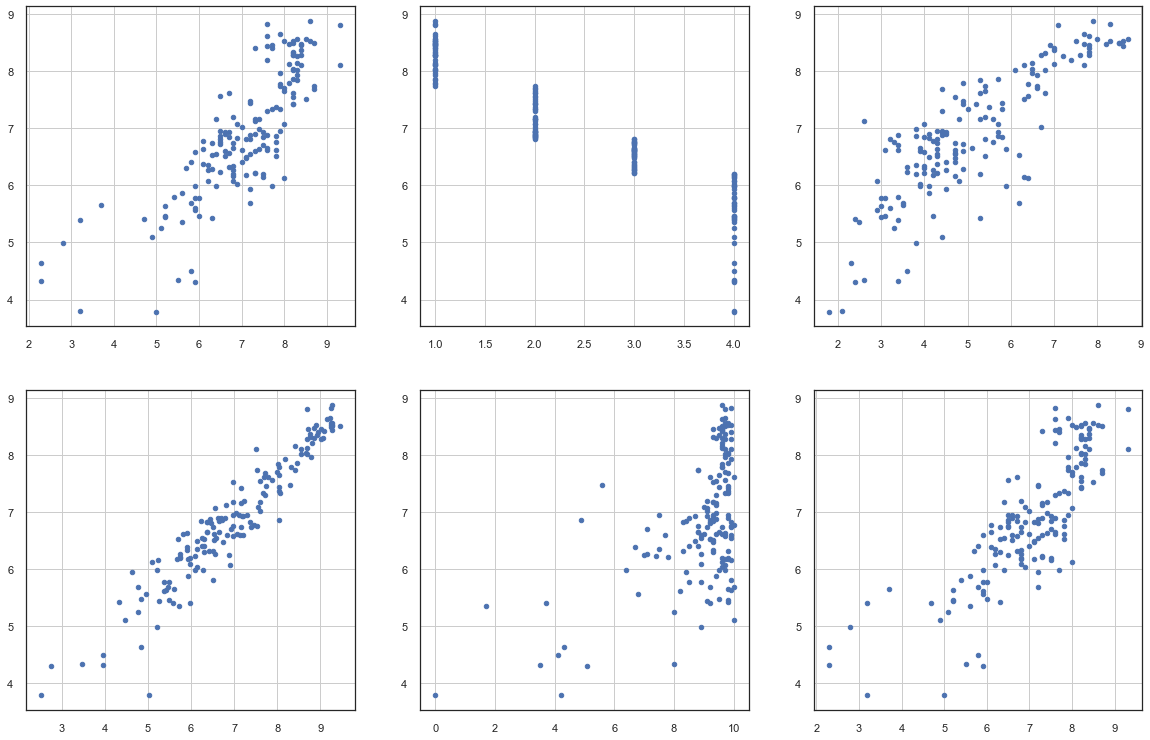

In [365]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

y_train = hf_score.astype('float')

clf = ExtraTreesRegressor(n_estimators=30)
clf = clf.fit(data_2017_selected_features.values, y_train)
model = SelectFromModel(clf, prefit=True)

x_train_treeselected = model.transform(data_2017_selected_features)
print(x_train_treeselected.shape)

x_train_treeselected.astype('float')

plt.figure(figsize=(20, 20))
for idx in range(x_train_treeselected.shape[1]+1):
    x = x_train_treeselected[:, idx-1].astype('float')
    plt.subplot(3, 3, idx+1)
    plt.grid(True)
    plt.scatter(x, hf_score, s=20)
#     plt.savefig(r'C:\Users\ian_c\Desktop\ECS\Adv Machine Learning\IEEETransactions_LaTeX\IEEEtran\fig\x_train_treeselected.png')

## 3.1 Selected training data

### Regression analysis with tree selected data

In [296]:
print(x_train_treeselected.shape)

(162, 5)


In [299]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

test_start = 130
regr = RandomForestRegressor(max_depth = 5, random_state=0)
regr.fit(x_train_treeselected[:test_start], y_train[:test_start])
regr.score(x_train_treeselected[test_start:], y_train[test_start:])

0.9306531294675487

In [307]:
# SVR
from sklearn.svm import SVR
test_start = 130
svr = SVR(kernel = 'poly', C=1.0, epsilon=0.1, max_iter=300)
svr.fit(x_train_treeselected[:test_start], y_train[:test_start])
svr.score(x_train_treeselected[test_start:], y_train[test_start:])

0.9730946198759657

In [308]:
from sklearn.neural_network import MLPRegressor
test_start = 130
regressor = MLPRegressor(hidden_layer_sizes = (200, 75, 50, 25), activation = 'relu',
                         solver = 'sgd',
                         learning_rate = 'adaptive',
                         random_state = 1)
regressor.fit(x_train_treeselected[:test_start], y_train[:test_start])
regressor.score(x_train_treeselected[test_start:], y_train[test_start:])

0.9875147658399235

In [309]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=150)
ada.fit(x_train_treeselected[:test_start], y_train[:test_start])
ada.score(x_train_treeselected[test_start:], y_train[test_start:])

0.9372275534017931

In [313]:
# xgboost regression
import xgboost
import numpy as np
test_start = 130

xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.06,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=100,
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(x_train_treeselected[:test_start], y_train[:test_start])
xgb.score(x_train_treeselected[test_start:], y_train[test_start:])

0.9633143637513665

## K2  data for regression analysis

In [314]:
print('-----------------')
print(x_train_k2)
print(x_train_k2.shape)

-----------------
[['1' '5.3' '10' ... '6.7' '7.8' '7.67']
 ['4' '3.8' '8.9' ... '5.7' '5.4' '4.77']
 ['4' '3.4' '8.9' ... '4.9' '5.7' '4.83']
 ...
 ['4' '2.4' '1.2' ... '4' '5' '5.84']
 ['3' '4.1' '9.5' ... '6.2' '6.5' '6.84']
 ['4' '3.5' '9' ... '5' '6.7' '5.69']]
(162, 30)


In [318]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

test_start = 130
regr = RandomForestRegressor(max_depth = 5, random_state=0, n_estimators=200)
regr.fit(x_train_k2[:test_start], y_train[:test_start])
regr.score(x_train_k2[test_start:], y_train[test_start:])

0.8690484958381169

In [319]:
# SVR
from sklearn.svm import SVR
test_start = 130
svr = SVR(kernel = 'poly', C=1.0, epsilon=0.2, max_iter=5000, degree=2)
svr.fit(x_train_k2[:test_start], y_train[:test_start])
svr.score(x_train_k2[test_start:], y_train[test_start:])

0.977540088635859

In [372]:
from sklearn.neural_network import MLPRegressor
test_start = 130
regressor = MLPRegressor(hidden_layer_sizes = (200, 75, 50, 25), activation = 'relu',
                         solver = 'sgd',
                         learning_rate = 'adaptive',
                         random_state = 1)
regressor.fit(x_train_k2[:test_start], y_train[:test_start])
regressor.score(x_train_k2[test_start:], y_train[test_start:])

0.9686485602077892

In [323]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=150)
ada.fit(x_train_k2[:test_start], y_train[:test_start])
ada.score(x_train_k2[test_start:], y_train[test_start:])

0.8561612206554965

In [348]:
# xgboost regression
import xgboost
import numpy as np
test_start = 130

xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.06,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=100,
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(x_train_k2[:test_start], y_train[:test_start])
xgb.score(x_train_k2[test_start:], y_train[test_start:])

0.9521173335047577

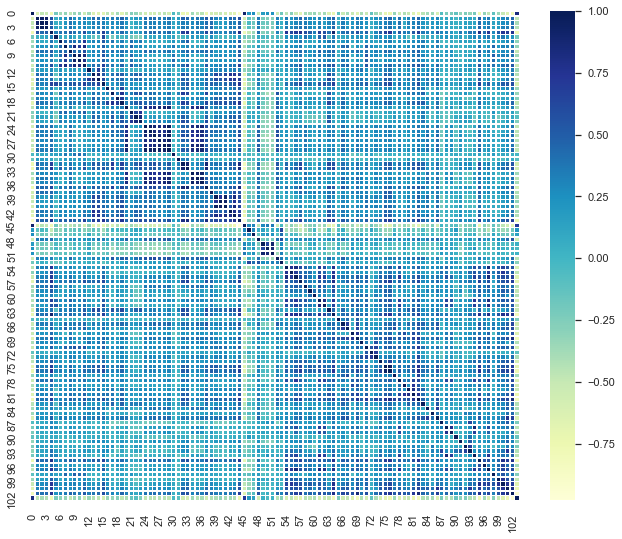

In [16]:
import seaborn as sns

vis_data = data_2017_selected_features.values.astype(np.float32())
corr = pd.DataFrame(vis_data).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

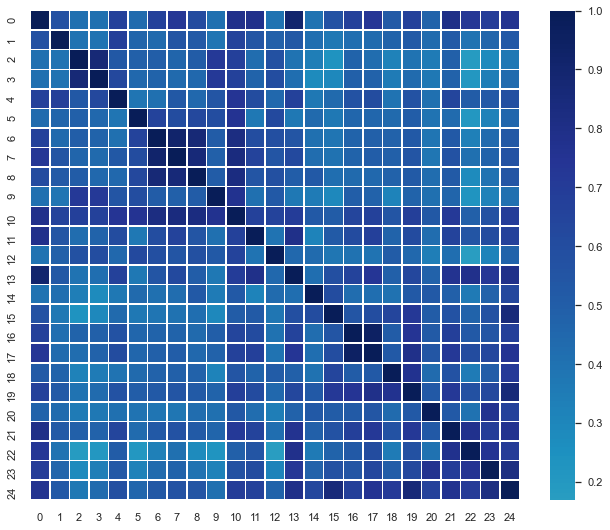

In [17]:
corr = pd.DataFrame(x_train).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

## 4 Auto generated data report via profile report

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data_2017_selected, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
# profile.to_widgets()

## 5.1 Feature selection manually

In [343]:
# Read the data of Human-Freedom-Index from its original csv file.
data = pd.read_csv(r'human-freedom-index-2019.csv')
global_year = '2017-01-01'
data['year'] = pd.to_datetime(data['year'], format='%Y')
data = data.set_index(['year'])
data = data.loc[global_year]
data = data.reset_index()

# Location of non basic features(the features are calculated by others)
non_basic_feature = [1, 2, 3, 4, 5, 6, 7, 11, 18, 22, 23, 24, 28, 31, 34, 39, 41,
                     45, 46, 54, 58, 60, 61, 62, 68, 70, 81, 87, 90, 93, 98, 99, 103, 110, 117, 118, 119, 120]

# Totally empty columns (are features which are very difficult to acquire)
empty_column = [20, 21, 29, 30, 37, 38, 40, 41, 43, 44]

# Columns need to be ignored.
questionable_feature = [80]

# Columns which are highly correlated to other columns(have correlation coefficient is greater than 0.9)
highly_correlated = [66, 67, 92,
                     35, 39, 49, 56, 57, 11, 9, 10, 8, 17, 22]

# Non basic features but are necessary(theirs basic features are partially or totally missing)
exempted_nbf = [68, 93, 46, 50, 58, 81, 23]
# Concentrate all lists taht hold the elements which are about to be abandoned.
abandon_list = non_basic_feature + empty_column + \
    questionable_feature + highly_correlated
print(len(abandon_list))
# Remove duplicates.
abandon_list = list(dict.fromkeys(abandon_list))
# Manipulate data into a shape we need.
final_list = []

for location in abandon_list:
    if location not in exempted_nbf:
        final_list.append(data.columns[location-1])

data = data.drop(columns=final_list, axis=1)
data = data.replace('-', 0)
feature_selected_manually = data.fillna(0)
feature_selected_manually

63


,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_women_fgm,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,...,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance
0,9.1,10,10,10,10,10,8.8,10,10,10,...,6.4,8,6.3,10,6.3,6.7,9.7,4.1,6,7.2
1,9.5,10,9.5,5,9.9,10,5,10,5,2.5,...,6,6,7.8,3,3.7,1.8,9.3,3.8,8.7,7
2,8.1,10,9.7,7.5,9.9,10,7.5,5,5,10,...,7.2,4,6.6,0,2.4,1.3,8.7,1.9,8.1,6.8
3,8,5,10,7.5,10,10,10,10,10,10,...,3.3,10,2.5,10,2.5,7.1,9.6,3.3,5.4,6.5
4,9,10,10,7.5,10,10,8.8,10,5,10,...,6.8,10,9.3,0,4.6,6.2,9.9,4.6,9.3,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0,10,10,5,9.9,10,10,0,10,10,...,5.6,4,0,0,1.1,0,3.3,1.5,5,1.1
158,9.4,10,10,10,10,10,8.8,0,5,10,...,6.2,10,2.5,0,3.7,6.4,9.4,3.7,8.2,4.4
159,7.3,0,0,0,1,8.1,4.1,0,5,0,...,6.4,8,2.5,10,3.1,0,7.5,2.1,0,7.2
160,7.9,10,10,7.5,10,10,7.5,0,10,2.5,...,7.1,8,0,10,4.4,4,9.4,3.1,7.8,8.2


##  Regression analysis on our hand-crafted features

In [356]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
y_train = hf_score.astype('float')
test_start = 130
regr = RandomForestRegressor(max_depth = 5, random_state=0, n_estimators=200)
regr.fit(feature_selected_manually.values[:test_start], y_train[:test_start])
regr.score(feature_selected_manually.values[test_start:], y_train[test_start:])

0.779180870639469

In [357]:
# SVR
from sklearn.svm import SVR
test_start = 130
svr = SVR(kernel = 'poly', C=1.0, epsilon=0.1, max_iter=300)
svr.fit(feature_selected_manually.values[:test_start], y_train[:test_start])
svr.score(feature_selected_manually.values[test_start:], y_train[test_start:])

0.9412904434482785

In [358]:
from sklearn.neural_network import MLPRegressor
test_start = 130
regressor = MLPRegressor(hidden_layer_sizes = (200, 75, 50, 25), activation = 'relu',
                         solver = 'sgd',
                         learning_rate = 'adaptive',
                         random_state = 1)
regressor.fit(feature_selected_manually.values[:test_start], y_train[:test_start])
regressor.score(feature_selected_manually.values[test_start:], y_train[test_start:])

0.8570922178641147

In [361]:
from sklearn.ensemble import AdaBoostRegressor
test_start = 130
ada = AdaBoostRegressor(random_state=0, n_estimators=250)
ada.fit(feature_selected_manually.values[:test_start], y_train[:test_start])
ada.score(feature_selected_manually.values[test_start:], y_train[test_start:])

0.7591058590611597

In [360]:
# xgboost regression
import xgboost
import numpy as np
test_start = 130

xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.06,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=100,
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(feature_selected_manually.values[:test_start], y_train[:test_start])
xgb.score(feature_selected_manually.values[test_start:], y_train[test_start:])

0.8755889995912213